# DATA PROCESSING

This project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.

In [520]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [521]:
# Reading the dataset 
df = pd.read_csv("Employee.csv")
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [522]:
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [523]:
df.shape

(148, 6)

In [524]:
df.size

888

## Data Exploration

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [526]:
# Statistical Analysis of the data
df.describe() 

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [527]:
df.describe(include='all')

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [528]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

### The unique values in each feature and find its length

In [529]:
for i in df.columns:
    print("Name of column : ",i)
    print("Unique value in column ",i," : ", df[i].unique())
    print("Count of Unique value in column ",i,"is",len(df[i].unique()))
    print("\n")

Name of column :  Company
Unique value in column  Company  :  ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Count of Unique value in column  Company is 7


Name of column :  Age
Unique value in column  Age  :  [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Count of Unique value in column  Age is 30


Name of column :  Salary
Unique value in column  Salary  :  [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Count of Unique value in column  Salary is 41


Name of column :  Place
Unique value in column  Place  :  ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Count of Unique value in column  Place is 12


Name

### Renaming the Columns

In [530]:
df = df.rename(columns={
    'Company': 'Employer',
    'Age': 'Employee_Age',
    'Salary': 'Monthly_Salary',
    'Place': 'Location',
    'Country': 'Employee_Country',
    'Gender': 'Employee_Gender'
})
print(df.columns)

Index(['Employer', 'Employee_Age', 'Monthly_Salary', 'Location',
       'Employee_Country', 'Employee_Gender'],
      dtype='object')


## Data Cleaning

### Find the null values

In [531]:
print(df.isnull().sum())

Employer             8
Employee_Age        18
Monthly_Salary      24
Location            14
Employee_Country     0
Employee_Gender      0
dtype: int64


### Filling the null values with mean values and mode values

In [532]:
df.mean

<bound method DataFrame.mean of     Employer  Employee_Age  Monthly_Salary  Location Employee_Country  \
0        TCS          20.0             NaN   Chennai            India   
1    Infosys          30.0             NaN    Mumbai            India   
2        TCS          35.0          2300.0  Calcutta            India   
3    Infosys          40.0          3000.0     Delhi            India   
4        TCS          23.0          4000.0    Mumbai            India   
..       ...           ...             ...       ...              ...   
143      TCS          33.0          9024.0  Calcutta            India   
144  Infosys          22.0          8787.0  Calcutta            India   
145  Infosys          44.0          4034.0     Delhi            India   
146      TCS          33.0          5034.0    Mumbai            India   
147  Infosys          22.0          8202.0    Cochin            India   

     Employee_Gender  
0                  0  
1                  0  
2                  0  

In [533]:
df = df.fillna(df.mean(numeric_only=True))

In [534]:
df.isnull().sum()

Employer             8
Employee_Age         0
Monthly_Salary       0
Location            14
Employee_Country     0
Employee_Gender      0
dtype: int64

In [535]:
df.mode

<bound method DataFrame.mode of     Employer  Employee_Age  Monthly_Salary  Location Employee_Country  \
0        TCS          20.0     5312.467742   Chennai            India   
1    Infosys          30.0     5312.467742    Mumbai            India   
2        TCS          35.0     2300.000000  Calcutta            India   
3    Infosys          40.0     3000.000000     Delhi            India   
4        TCS          23.0     4000.000000    Mumbai            India   
..       ...           ...             ...       ...              ...   
143      TCS          33.0     9024.000000  Calcutta            India   
144  Infosys          22.0     8787.000000  Calcutta            India   
145  Infosys          44.0     4034.000000     Delhi            India   
146      TCS          33.0     5034.000000    Mumbai            India   
147  Infosys          22.0     8202.000000    Cochin            India   

     Employee_Gender  
0                  0  
1                  0  
2                  0  

In [536]:
df['Employer'].fillna(df['Employer'].mode().iloc[0],inplace=True)
df['Location'].fillna(df['Location'].mode().iloc[0],inplace=True)


C:\Users\benzb\AppData\Local\Temp\ipykernel_11992\3884368476.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employer'].fillna(df['Employer'].mode().iloc[0],inplace=True)
C:\Users\benzb\AppData\Local\Temp\ipykernel_11992\3884368476.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [537]:
df.isnull().sum()

Employer            0
Employee_Age        0
Monthly_Salary      0
Location            0
Employee_Country    0
Employee_Gender     0
dtype: int64

### Remove all duplicate rows

In [538]:
df[df.duplicated()]

,Employer,Employee_Age,Monthly_Salary,Location,Employee_Country,Employee_Gender
84,CTS,43.000000,5312.467742,Mumbai,India,0
130,TCS,21.000000,4824.000000,Mumbai,India,0
131,Infosys,30.484615,5835.000000,Mumbai,India,0
144,Infosys,22.000000,8787.000000,Calcutta,India,1


In [539]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Employer,Employee_Age,Monthly_Salary,Location,Employee_Country,Employee_Gender


### Find the outliers of column Employee_Age and Monthly_Salary

In [540]:
# Calculate IQR of column Monthly_Salary
Q1 = df['Monthly_Salary'].quantile(0.25)
Q3 = df['Monthly_Salary'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 =",Q1)
print("Q3 =",Q3)

# Identify outliers
outliers_iqr = df[(df['Monthly_Salary'] < (Q1 - 1.5 * IQR)) | (df['Monthly_Salary'] > (Q3 + 1.5 * IQR))]
print("\nOutliers found by IQR Method")
outliers_iqr

Q1 = 3045.0
Q3 = 7084.0

Outliers found by IQR Method


,Employer,Employee_Age,Monthly_Salary,Location,Employee_Country,Employee_Gender


In [541]:
# Calculate IQR of column Employee_Age
Q1 = df['Employee_Age'].quantile(0.25)
Q3 = df['Employee_Age'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 =",Q1)
print("Q3 =",Q3)

# Identify outliers
outliers_iqr = df[(df['Employee_Age'] < (Q1 - 1.5 * IQR)) | (df['Employee_Age'] > (Q3 + 1.5 * IQR))]
print("\nOutliers found by IQR Method")
outliers_iqr

Q1 = 23.0
Q3 = 36.0

Outliers found by IQR Method


,Employer,Employee_Age,Monthly_Salary,Location,Employee_Country,Employee_Gender
88,Infosys,0.0,3030.0,Calcutta,India,0
92,TCS,0.0,3045.0,Delhi,India,0
101,CTS,0.0,2034.0,Podicherry,India,0
107,TCS,0.0,9024.0,Chennai,India,1
111,Infosys,0.0,3234.0,Mumbai,India,0
121,CTS,0.0,1234.0,Calcutta,India,0


### Replace the value 0 in age as NaN

In [542]:
df[df.Employee_Age==0]

,Employer,Employee_Age,Monthly_Salary,Location,Employee_Country,Employee_Gender
88,Infosys,0.0,3030.0,Calcutta,India,0
92,TCS,0.0,3045.0,Delhi,India,0
101,CTS,0.0,2034.0,Podicherry,India,0
107,TCS,0.0,9024.0,Chennai,India,1
111,Infosys,0.0,3234.0,Mumbai,India,0
121,CTS,0.0,1234.0,Calcutta,India,0


In [543]:
df['Employee_Age'].replace(0,np.NaN,inplace=True)

C:\Users\benzb\AppData\Local\Temp\ipykernel_11992\945164651.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employee_Age'].replace(0,np.NaN,inplace=True)


In [544]:
df[df.Employee_Age==0]

,Employer,Employee_Age,Monthly_Salary,Location,Employee_Country,Employee_Gender


### Treat the null values in all columns using any measures

In [545]:
df.isnull().sum()

Employer            0
Employee_Age        6
Monthly_Salary      0
Location            0
Employee_Country    0
Employee_Gender     0
dtype: int64

In [546]:
df = df.fillna(df.mean(numeric_only=True))

In [547]:
df.isnull().sum()

Employer            0
Employee_Age        0
Monthly_Salary      0
Location            0
Employee_Country    0
Employee_Gender     0
dtype: int64

## Data Analysis

### Filter the data with age >40 and salary<5000

In [548]:
df_filtered = df[(df['Employee_Age']>40) & (df['Monthly_Salary']<5000)]
df_filtered

,Employer,Employee_Age,Monthly_Salary,Location,Employee_Country,Employee_Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


### Ploting the chart with age and salary

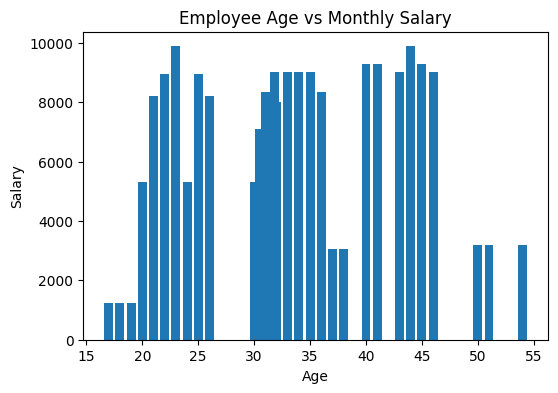

In [549]:
plt.figure(figsize=(6,4))
plt.bar(df.Employee_Age,df.Monthly_Salary)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Employee Age vs Monthly Salary")
plt.show()

The chart shows that employees aged 35 to 45 receive the highest salaries, with a peak around 40 years old.
Salaries decrease for employees younger than 35 and older than 45.

### Counting the number of people from each place and representing visually

<Axes: xlabel='count', ylabel='Location'>

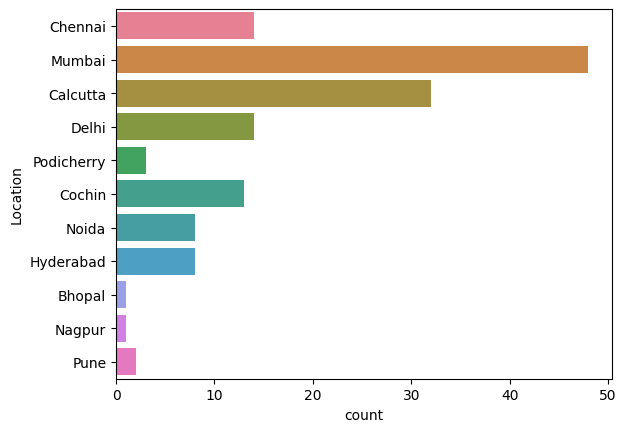

In [550]:
sns.countplot(y='Location', data=df, hue='Location', legend=False)

Mumbai has the highest count of employees, followed by Calcutta and Chennai
Nagpur and Bhopal has the lowest count among the listed locations.

## Data Encoding

### Convert categorical variables into numerical representations using as following

### One-hot encoding

In [551]:
df_one_hot_encoded = pd.get_dummies(data = df, columns = ["Employer", "Location","Employee_Country"])

print(df_one_hot_encoded )

     Employee_Age  Monthly_Salary  Employee_Gender  Employer_CTS  \
0            20.0     5312.467742                0         False   
1            30.0     5312.467742                0         False   
2            35.0     2300.000000                0         False   
3            40.0     3000.000000                0         False   
4            23.0     4000.000000                0         False   
..            ...             ...              ...           ...   
142          22.0     8202.000000                0         False   
143          33.0     9024.000000                1         False   
145          44.0     4034.000000                1         False   
146          33.0     5034.000000                1         False   
147          22.0     8202.000000                0         False   

     Employer_Congnizant  Employer_Infosys  Employer_Infosys Pvt Lmt  \
0                  False             False                     False   
1                  False              T

In [552]:
from sklearn.preprocessing import OneHotEncoder
cols_to_encode = ["Employer", "Location","Employee_Country"]
new_encoded_cols_names = []
for col in cols_to_encode:
  new_encoded_cols_names += [f"is_{category}" for category in df[col].sort_values().unique().tolist()]
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode]).toarray()
df_encoded = pd.DataFrame(encoded_cols, columns=new_encoded_cols_names)
df_one_hot_encoded = df.join(df_encoded)
print(df_one_hot_encoded)

            Employer  Employee_Age  Monthly_Salary  Location Employee_Country  \
0                TCS          20.0     5312.467742   Chennai            India   
1            Infosys          30.0     5312.467742    Mumbai            India   
2                TCS          35.0     2300.000000  Calcutta            India   
3            Infosys          40.0     3000.000000     Delhi            India   
4                TCS          23.0     4000.000000    Mumbai            India   
..               ...           ...             ...       ...              ...   
142  Infosys Pvt Lmt          22.0     8202.000000    Mumbai            India   
143              TCS          33.0     9024.000000  Calcutta            India   
145          Infosys          44.0     4034.000000     Delhi            India   
146              TCS          33.0     5034.000000    Mumbai            India   
147          Infosys          22.0     8202.000000    Cochin            India   

     Employee_Gender  is_CT

### Label encoding

In [553]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in df[["Employer","Location","Employee_Country"]]:
    df[i] = label_encoder.fit_transform(df[i])
df

,Employer,Employee_Age,Monthly_Salary,Location,Employee_Country,Employee_Gender
0,4,20.0,5312.467742,2,0,0
1,2,30.0,5312.467742,6,0,0
2,4,35.0,2300.000000,1,0,0
3,2,40.0,3000.000000,4,0,0
4,4,23.0,4000.000000,6,0,0
...,...,...,...,...,...,...
142,3,22.0,8202.000000,6,0,0
143,4,33.0,9024.000000,1,0,1
145,2,44.0,4034.000000,4,0,1
146,4,33.0,5034.000000,6,0,1


## Scaling

### StandardScaler

In [554]:
from sklearn.preprocessing import StandardScaler


# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data
print(scaled_data.round(2))


[[ 0.99 -1.44  0.01 -0.89  0.   -0.53]
 [-0.24 -0.22  0.01  0.75  0.   -0.53]
 [ 0.99  0.38 -1.27 -1.3   0.   -0.53]
 [-0.24  0.99 -0.97 -0.07  0.   -0.53]
 [ 0.99 -1.08 -0.55  0.75  0.   -0.53]
 [-0.24 -0.17 -0.12 -1.3   0.   -0.53]
 [ 0.99 -0.17  0.3  -0.89  0.    1.87]
 [-0.24 -1.08  0.73  0.75  0.    1.87]
 [ 0.99  0.26  1.15 -1.3   0.    1.87]
 [-1.47  1.6   1.57 -0.07  0.   -0.53]
 [-1.47 -1.08  0.01  0.75  0.   -0.53]
 [-1.47  0.26 -1.78 -1.3   0.   -0.53]
 [-1.47  1.6   0.01 -0.89  0.   -0.53]
 [-1.47 -1.68 -1.72  0.75  0.   -0.53]
 [-0.24  0.99 -0.97 -1.3   0.   -0.53]
 [ 0.99 -1.08 -0.97 -0.07  0.   -0.53]
 [-0.24 -1.08 -0.96  1.98  0.   -0.53]
 [ 0.99  0.26 -0.12 -0.48  0.   -0.53]
 [ 0.99 -1.2   0.01 -0.89  0.   -0.53]
 [-0.24  0.02  0.01  0.75  0.   -0.53]
 [ 0.99  0.63 -0.95 -1.3   0.   -0.53]
 [-0.24  2.21 -0.89 -0.07  0.   -0.53]
 [ 0.99 -1.32 -0.2   0.75  0.   -0.53]
 [-0.24 -0.17  0.23 -0.48  0.   -0.53]
 [ 0.99 -0.17  0.76 -0.89  0.    1.87]
 [-0.24 -1.08  1.55  0.75

### MinMaxScaler

In [555]:
from sklearn.preprocessing import MinMaxScaler


# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data
print(scaled_data.round(1))

[[0.8 0.1 0.5 0.2 0.  0. ]
 [0.4 0.4 0.5 0.6 0.  0. ]
 [0.8 0.5 0.1 0.1 0.  0. ]
 [0.4 0.6 0.2 0.4 0.  0. ]
 [0.8 0.2 0.3 0.6 0.  0. ]
 [0.4 0.4 0.4 0.1 0.  0. ]
 [0.8 0.4 0.6 0.2 0.  1. ]
 [0.4 0.2 0.7 0.6 0.  1. ]
 [0.8 0.5 0.8 0.1 0.  1. ]
 [0.  0.8 0.9 0.4 0.  0. ]
 [0.  0.2 0.5 0.6 0.  0. ]
 [0.  0.5 0.  0.1 0.  0. ]
 [0.  0.8 0.5 0.2 0.  0. ]
 [0.  0.  0.  0.6 0.  0. ]
 [0.4 0.6 0.2 0.1 0.  0. ]
 [0.8 0.2 0.2 0.4 0.  0. ]
 [0.4 0.2 0.2 0.9 0.  0. ]
 [0.8 0.5 0.4 0.3 0.  0. ]
 [0.8 0.1 0.5 0.2 0.  0. ]
 [0.4 0.4 0.5 0.6 0.  0. ]
 [0.8 0.5 0.2 0.1 0.  0. ]
 [0.4 0.9 0.2 0.4 0.  0. ]
 [0.8 0.1 0.4 0.6 0.  0. ]
 [0.4 0.4 0.5 0.3 0.  0. ]
 [0.8 0.4 0.7 0.2 0.  1. ]
 [0.4 0.2 0.9 0.6 0.  1. ]
 [0.8 0.5 0.8 0.1 0.  1. ]
 [0.  0.8 0.9 0.4 0.  1. ]
 [0.  0.2 1.  0.6 0.  1. ]
 [0.  0.5 0.1 0.3 0.  0. ]
 [0.  0.8 0.7 0.2 0.  0. ]
 [0.  0.1 0.2 0.6 0.  0. ]
 [0.4 0.8 0.3 0.1 0.  0. ]
 [0.8 0.5 0.4 0.6 0.  0. ]
 [0.4 0.2 0.8 0.6 0.  0. ]
 [0.8 0.5 0.9 0.6 0.  1. ]
 [0.8 0.4 0.5 0.8 0.  0. ]
 